# Exercise (Solution): Statistics

Q0: load the dataset (`students.csv`) to conduct Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the student data
df = pd.read_csv("../../datasets/academy/students.csv")
df

,student_id,gender,origin,age
0,1,F,North,21
1,2,M,Center,26
2,3,F,South,23
3,4,F,North,26
4,5,F,East,22
...,...,...,...,...
235,236,F,West,21
236,237,M,North,21
237,238,M,Center,23
238,239,F,North,24


Q1: classify each to a type of measurement (Nominal, Oridnal, Interval/Ratio)

1. student ID
1. gender
1. origin
1. age

Answer: 

Q2. What is the distribution of gender? (plot)

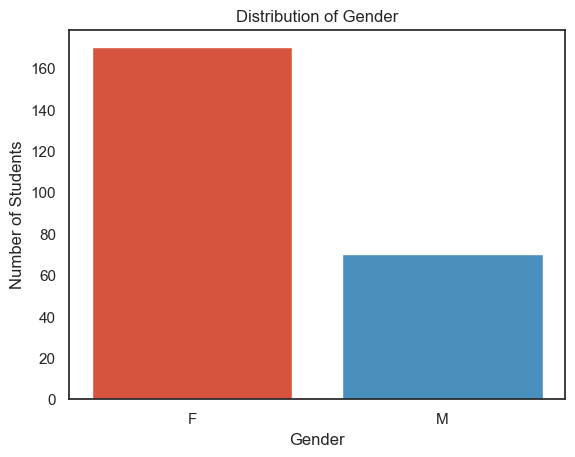

In [12]:
import matplotlib.pyplot as plt

# Get the number of students in each gender
gender_counts = df["gender"].value_counts()

# Create a bar chart of the number of students in each gender
# sns.set(style='ticks')
# plt.figure(figsize=(7,5))
plt.bar(gender_counts.index, gender_counts.values, color=['#d6543e', '#4990bf'])
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.title("Distribution of Gender")
plt.show()

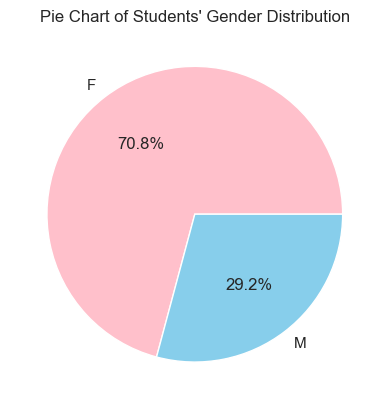

In [3]:
import matplotlib.pyplot as plt

# Get unique gender counts
genders = df['gender'].value_counts()

plt.pie(
    genders,              # <-- counts
    labels=genders.index, # <-- labels
    autopct="%1.1f%%",          # <-- shows the numbers
    colors=["pink", "skyblue"]) # <-- choose light colors
plt.title("Pie Chart of Students' Gender Distribution") # <-- title
plt.show()


Q3. What is the distribution of origins? (plot)

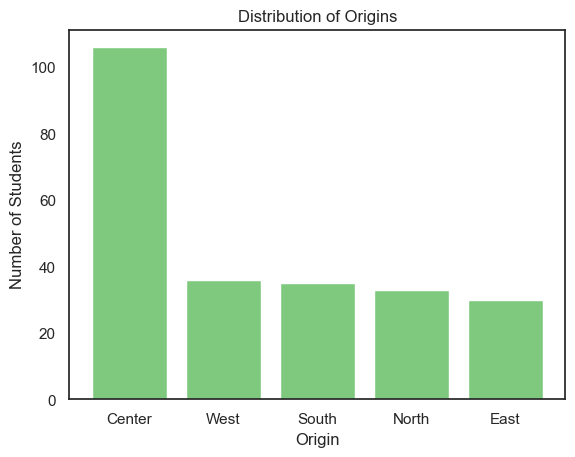

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of students from each origin
origin_counts = df["origin"].value_counts()

sns.set_theme(style='white', palette="Accent") # <-- https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Create a bar chart of the number of students from each origin
plt.bar(origin_counts.index, origin_counts.values)
plt.xlabel("Origin")
plt.ylabel("Number of Students")
plt.title("Distribution of Origins")
plt.show()

C:\Users\hgoz\AppData\Local\Temp\ipykernel_4080\3488312757.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


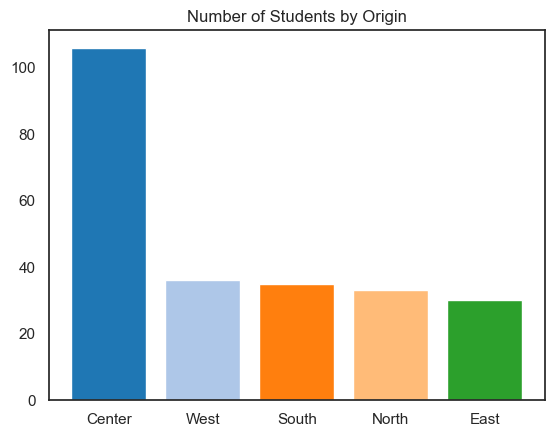

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique origins
origins = df['origin'].value_counts()

# Create a colormap for the origins
cmap = plt.cm.get_cmap('tab20')
colors = cmap(np.arange(len(origins)) % cmap.N)

plt.bar(origins.index, origins, color=colors)

# Set the title of the plot
plt.title("Number of Students by Origin")

# Show the plot
plt.show()

Q4. What is the mean, median, and range of students' age?

Q5. What is the standard deviation and variance of student's age?

In [6]:
# Answers Q4 and Q5
print(df.describe())
print('--')
print('range:    ', df['age'].max() - df['age'].min())
print('variance: ', df['age'].var())

       student_id         age
count   240.00000  240.000000
mean    120.50000   23.116667
std      69.42622    1.932689
min       1.00000   17.000000
25%      60.75000   22.000000
50%     120.50000   23.000000
75%     180.25000   24.000000
max     240.00000   29.000000
--
range:     12
variance:  3.7352859135285934


Q6. Are there any outliers in students' age?

<Axes: xlabel='age', ylabel='gender'>

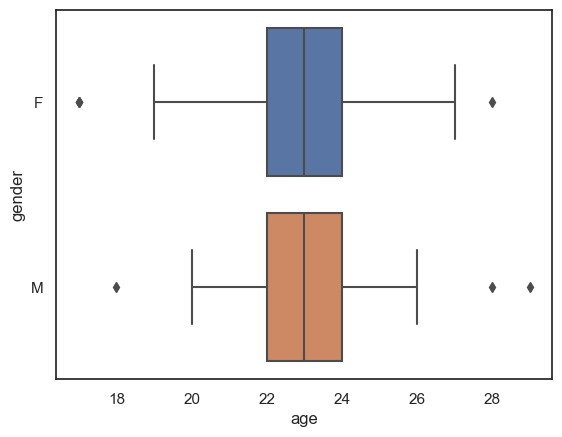

In [7]:
import seaborn as sns 

sns.boxplot(data=df, x='age', y='gender')

In [8]:
# Calculate the interquartile range (IQR) of the date of birth variable
age_iqr = df["age"].quantile(0.75) - df["age"].quantile(0.25)

# Calculate the upper and lower fences
upper_fence = df["age"].quantile(0.75) + 1.5 * age_iqr
lower_fence = df["age"].quantile(0.25) - 1.5 * age_iqr

# Identify any outliers
# outliers = df["age"].loc[(df["age"] > upper_fence) | (df["age"] < lower_fence)]
outliers = df[(df['age'] > upper_fence) | (df['age'] < lower_fence)]['age']

# Print the results
print("Outliers (using IQR method):")
if len(outliers) > 0:
    print(outliers)
else:
    print('... no outliers')

Outliers (using IQR method):
24     18
74     28
90     29
105    17
133    17
168    17
213    28
Name: age, dtype: int64


Q7. Plot the age distribution

<Axes: xlabel='age', ylabel='Density'>

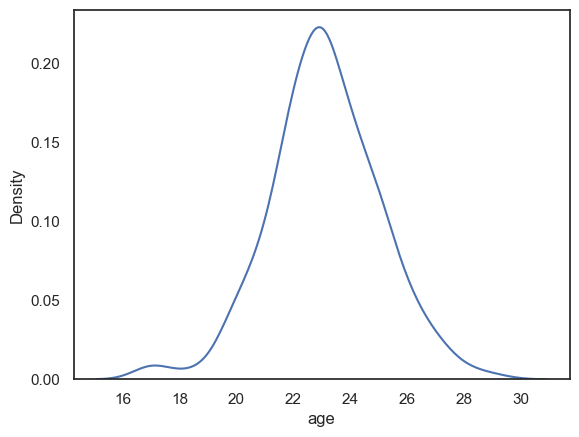

In [9]:
import seaborn as sns 

sns.kdeplot(data=df, x="age")